<a href="https://colab.research.google.com/github/TIN310/TTNT/blob/main/2001230811_Ph%E1%BA%A1m_Tr%C3%AD_T%C3%ADn__Bu%E1%BB%95i_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 TẠO DỮ LIỆU MẪU (CHẠY 1 LẦN)
1. Tạo file ma trận kề cho bài toán tô màu (graph.txt)
2. Tạo file chi phí cho bài toán người bán hàng (cost.txt)
(Ma trận chi phí giữa: TP.HCM, Đà Nẵng, Hà Nội, Cần Thơ)

In [2]:
#1
with open("graph.txt", "w") as f:
    f.write("""0,1,1,0,1,0
1,0,1,1,0,1
1,1,0,1,1,0
0,1,1,0,0,1
1,0,1,0,0,1
0,1,0,1,1,0""")

#2
with open("cost.txt", "w") as f:
    f.write("""0,960,1720,170
960,0,760,1130
1720,760,0,1800
170,1130,1800,0""")

print("Đã tạo thành công file 'graph.txt' và 'cost.txt'!")

Đã tạo thành công file 'graph.txt' và 'cost.txt'!


1. Xử lý dữ liệu đầu vào (doc_ma_tran) :
Hàm này đọc dữ liệu từ file graph.txt. Dữ liệu được lưu dưới dạng Ma trận kề (Adjacency Matrix), trong đó số 1 thể hiện có đường đi và số 0 thể hiện không có đường đi.
2. Chiến lược Heuristic (tinh_bac_va_sap_xep) : tính bậc (degree) của từng đỉnh (số lượng cạnh nối với đỉnh đó).
3. Phần Thuật toán Tô màu (thuat_toan_to_mau) : Sau khi đã có danh sách các đỉnh được sắp xếp thì sẽ duyệt qua từng đỉnh.
Với mỗi đỉnh, em kiểm tra danh sách màu. Em sẽ chọn màu đầu tiên hợp lệ (tức là màu chưa bị các đỉnh  sử dụng).
 Dictionary cam_mau để theo dõi xem màu nào không được dùng cho đỉnh hiện tại.
5. Trực quan hóa (ve_do_thi_ket_qua)
Cuối cùng, dùng NetworkX để vẽ đồ thị.Sử dụng spring_layout để các đỉnh không bị chồng chéo lên nhau, giúp hình vẽ rõ ràng. Các đỉnh sẽ được tô đúng màu mà thuật toán đã tìm ra.

=== BÀI TẬP TÔ MÀU ĐỒ THỊ 
Đọc thành công ma trận 6 đỉnh.
Thứ tự tô màu (ưu tiên bậc cao): ['B', 'C', 'A', 'D', 'E', 'F']

--- KẾT QUẢ CHI TIẾT ---
Đỉnh       | Bậc        | Màu Được Tô
----------------------------------------
A          | 3          | Blue
B          | 4          | Red
C          | 4          | Green
D          | 3          | Blue
E          | 3          | Red
F          | 3          | Green

Tổng số màu sử dụng: 3

Đang vẽ đồ thị...


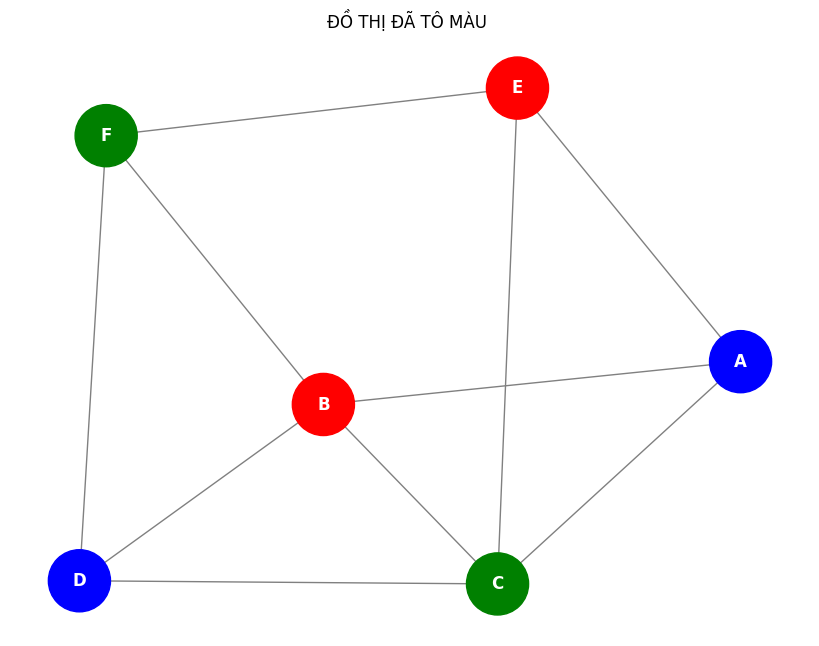

In [4]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

MAU_CO_BAN = ["Red", "Green", "Blue", "Yellow", "Purple", "Cyan", "Orange"]


def doc_ma_tran(duong_dan):
    """Đọc ma trận từ file txt và trả về numpy array."""
    try:
        data = np.loadtxt(duong_dan, delimiter=',', dtype=int)
        return data
    except Exception as e:
        print(f"Lỗi đọc file: {e}")
        return None

def tinh_bac_va_sap_xep(matrix, ten_dinh):
    """Tính bậc của đỉnh và sắp xếp danh sách đỉnh theo bậc giảm dần (Welsh-Powell)."""

    bac_dinh = np.sum(matrix, axis=1)

    danh_sach = []
    for i in range(len(ten_dinh)):
        danh_sach.append((ten_dinh[i], bac_dinh[i]))

    danh_sach_sap_xep = sorted(danh_sach, key=lambda x: x[1], reverse=True)

    ds_ten_sap_xep = [item[0] for item in danh_sach_sap_xep]
    dict_bac = {item[0]: item[1] for item in danh_sach}

    return ds_ten_sap_xep, dict_bac

def thuat_toan_to_mau(matrix, ds_dinh_sorted, ten_dinh_goc):
    """Thực hiện tô màu tham lam."""
    so_dinh = len(matrix)
    ket_qua_to = {}

    cam_mau = {dinh: [] for dinh in ten_dinh_goc}

    map_index = {ten: i for i, ten in enumerate(ten_dinh_goc)}

    for dinh in ds_dinh_sorted:
        idx_hien_tai = map_index[dinh]

        mau_chon = None
        for mau in MAU_CO_BAN:
            if mau not in cam_mau[dinh]:
                mau_chon = mau
                break

        if mau_chon is None:
            print(f"Không đủ màu để tô cho đỉnh {dinh}")
            return None

        ket_qua_to[dinh] = mau_chon

        hang_ke = matrix[idx_hien_tai]
        for i, lien_ket in enumerate(hang_ke):
            if lien_ket == 1: # Có đường nối
                ten_dinh_ke = ten_dinh_goc[i]
                if mau_chon not in cam_mau[ten_dinh_ke]:
                    cam_mau[ten_dinh_ke].append(mau_chon)

    return ket_qua_to

def ve_do_thi_ket_qua(matrix, ket_qua_to, ten_dinh):
    """Sử dụng NetworkX để vẽ đồ thị đã tô màu."""
    G = nx.from_numpy_array(matrix)

    colors_list = []
    for i in range(len(ten_dinh)):
        ten = ten_dinh[i]
        colors_list.append(ket_qua_to.get(ten, 'gray'))

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos,
            with_labels=True,
            labels={i: ten_dinh[i] for i in range(len(ten_dinh))},
            node_color=colors_list,
            node_size=2000,
            font_color='white',
            font_weight='bold',
            edge_color='gray')

    plt.title(f"ĐỒ THỊ ĐÃ TÔ MÀU ")
    plt.show()

def main_bai_1_2():
    print("=== BÀI TẬP TÔ MÀU ĐỒ THỊ ")

    file_path = 'graph.txt'
    G_matrix = doc_ma_tran(file_path)

    if G_matrix is None: return

    so_dinh = len(G_matrix)
    ten_dinh = [chr(65+i) for i in range(so_dinh)]

    print(f"Đọc thành công ma trận {so_dinh} đỉnh.")

    ds_sorted, dict_bac = tinh_bac_va_sap_xep(G_matrix, ten_dinh)
    print(f"Thứ tự tô màu (ưu tiên bậc cao): {ds_sorted}")

    ket_qua = thuat_toan_to_mau(G_matrix, ds_sorted, ten_dinh)

    print("\n--- KẾT QUẢ CHI TIẾT ---")
    print(f"{'Đỉnh':<10} | {'Bậc':<10} | {'Màu Được Tô'}")
    print("-" * 40)
    for dinh in sorted(ket_qua.keys()):
        print(f"{dinh:<10} | {dict_bac[dinh]:<10} | {ket_qua[dinh]}")

    so_mau = len(set(ket_qua.values()))
    print(f"\nTổng số màu sử dụng: {so_mau}")

    print("\nĐang vẽ đồ thị...")
    ve_do_thi_ket_qua(G_matrix, ket_qua, ten_dinh)

if __name__ == "__main__":
    main_bai_1_2()

1.  Thuật toán Quay lui & Nhánh cận (backtracking)

```
#  def backtracking(self, current_city, count, current_cost, path):
```
Dòng lệnh
```
#  if current_cost >= self.min_cost and self.min_cost != sys.maxsize:
```
giúp chương trình dừng ngay nhánh đang đi nếu thấy chi phí đã đắt hơn một lộ trình trọn vẹn đã tìm thấy trước đó. Điều này giúp tăng tốc độ xử lý.
Khi biến đếm count == n (đã đi qua hết các thành phố), em kiểm tra xem có đường quay về điểm xuất phát không. Nếu có và tổng chi phí thấp hơn kỷ lục cũ, em cập nhật min_cost và best_path.
Duyệt qua các thành phố, đánh dấu là đã thăm (True), gọi đệ quy, sau đó trả lại trạng thái cũ (False) để thử hướng đi khác (đây chính là nguyên lý Backtracking).

2. Hàm kích hoạt (giai_quyet):
```
def giai_quyet(self, start_node=0):
```
 Hàm này đơn giản là bước khởi động: Đánh dấu thành phố xuất phát (do người dùng chọn) là đã thăm và bắt đầu gọi đệ quy.

In [5]:

import sys

MAP_THANH_PHO = {
    0: "TP. Hồ Chí Minh",
    1: "Đà Nẵng",
    2: "Hà Nội",
    3: "Cần Thơ"
}

class TSPSolver:
    def __init__(self, matrix):
        self.matrix = matrix
        self.n = len(matrix)
        self.visited = [False] * self.n
        self.min_cost = sys.maxsize
        self.best_path = []

    def backtracking(self, current_city, count, current_cost, path):

        if current_cost >= self.min_cost and self.min_cost != sys.maxsize:
            return

        if count == self.n:
            dist_to_start = self.matrix[current_city][path[0]]
            if dist_to_start > 0:
                total = current_cost + dist_to_start
                if total < self.min_cost:
                    self.min_cost = total
                    self.best_path = path + [path[0]]
            return
        for i in range(self.n):
            if not self.visited[i] and self.matrix[current_city][i] > 0:
                self.visited[i] = True
                self.backtracking(i, count + 1, current_cost + self.matrix[current_city][i], path + [i])
                self.visited[i] = False

    def giai_quyet(self, start_node=0):
        self.visited[start_node] = True
        self.backtracking(start_node, 1, 0, [start_node])
        return self.min_cost, self.best_path

def main_bai_3():
    print("=== BÀI TOÁN NGƯỜI BÁN HÀNG (TSP) - SV: PHẠM TRÍ TÍN ===")

    try:
        matrix = np.loadtxt('cost.txt', delimiter=',', dtype=int)
    except:
        print("Lỗi đọc file cost.txt")
        return

    print("Danh sách thành phố:")
    for k, v in MAP_THANH_PHO.items():
        print(f"[{k}] - {v}")
    print("-" * 50)

    start_input = int(input(f"Nhập chỉ số thành phố xuất phát (0-{len(matrix)-1}): "))
    if start_input not in MAP_THANH_PHO:
        print("Chỉ số không hợp lệ!")
        return

    start_name = MAP_THANH_PHO[start_input]
    print(f"\n=> Đang tìm lộ trình tối ưu từ: {start_name}...")

    solver = TSPSolver(matrix)
    chi_phi, lo_trinh_idx = solver.giai_quyet(start_input)

    if lo_trinh_idx:
        lo_trinh_ten = [MAP_THANH_PHO[i] for i in lo_trinh_idx]
        print("\n" + "="*40)
        print(" KẾT QUẢ TỔNG QUAN")
        print("="*40)
        print(f"Chi phí thấp nhất: {chi_phi}")
        print(f"Lộ trình: {' -> '.join(lo_trinh_ten)}")

        print("\n--- CHI TIẾT ĐƯỜNG ĐI ---")
        for i in range(len(lo_trinh_idx) - 1):
            u = lo_trinh_idx[i]
            v = lo_trinh_idx[i+1]
            cost = matrix[u][v]
            print(f"Bước {i+1}: Từ {MAP_THANH_PHO[u]} đến {MAP_THANH_PHO[v]} (Chi phí: {cost})")
    else:
        print("Không tìm thấy chu trình hợp lệ.")

if __name__ == "__main__":
    main_bai_3()

=== BÀI TOÁN NGƯỜI BÁN HÀNG (TSP) - SV: PHẠM TRÍ TÍN ===
Danh sách thành phố:
[0] - TP. Hồ Chí Minh
[1] - Đà Nẵng
[2] - Hà Nội
[3] - Cần Thơ
--------------------------------------------------
Nhập chỉ số thành phố xuất phát (0-3): 1

=> Đang tìm lộ trình tối ưu từ: Đà Nẵng...

 KẾT QUẢ TỔNG QUAN
Chi phí thấp nhất: 3690
Lộ trình: Đà Nẵng -> TP. Hồ Chí Minh -> Cần Thơ -> Hà Nội -> Đà Nẵng

--- CHI TIẾT ĐƯỜNG ĐI ---
Bước 1: Từ Đà Nẵng đến TP. Hồ Chí Minh (Chi phí: 960)
Bước 2: Từ TP. Hồ Chí Minh đến Cần Thơ (Chi phí: 170)
Bước 3: Từ Cần Thơ đến Hà Nội (Chi phí: 1800)
Bước 4: Từ Hà Nội đến Đà Nẵng (Chi phí: 760)
